=== Fuzzifikasi ===
Permintaan Turun  = 0.500
Permintaan Naik   = 0.500
Persediaan Sedikit = 0.000
Persediaan Sedang  = 0.750
Persediaan Banyak  = 0.125

=== Inferensi Tsukamoto ===
α1 = 0.125, z1 = 6375.00
α2 = 0.500, z2 = 4500.00
α4 = 0.125, z4 = 6375.00
α5 = 0.500, z5 = 4500.00

Hasil Defuzzifikasi (Produksi) = 4875.00 kemasan


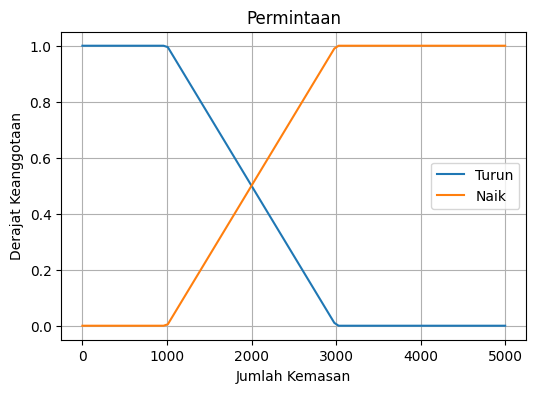

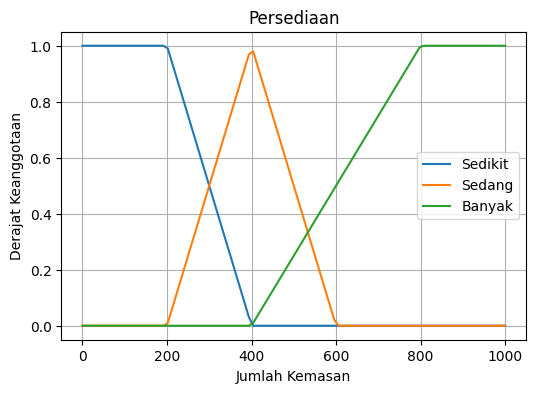

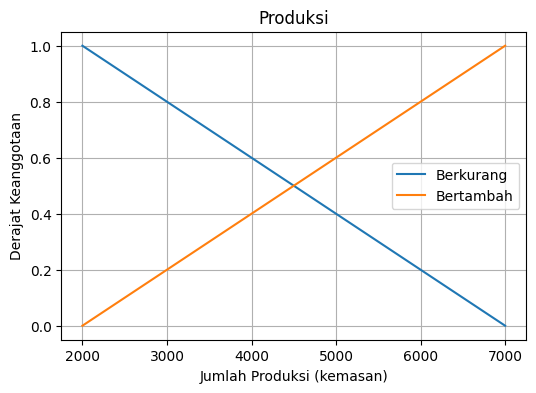

In [1]:
# UTS Kecerdasan Buatan
# Metode Fuzzy Tsukamoto
# Kasus: Produksi makanan kaleng ABC
# Permintaan = 2000, Persediaan = 450

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Fungsi Keanggotaan
# -----------------------------

def permintaan_turun(x):
    if x <= 1000:
        return 1
    elif 1000 < x < 3000:
        return (3000 - x) / (3000 - 1000)
    else:
        return 0

def permintaan_naik(x):
    if x <= 1000:
        return 0
    elif 1000 < x < 3000:
        return (x - 1000) / (3000 - 1000)
    else:
        return 1

def persediaan_sedikit(y):
    if y <= 200:
        return 1
    elif 200 < y < 400:
        return (400 - y) / (400 - 200)
    else:
        return 0

def persediaan_sedang(y):
    if 200 < y < 400:
        return (y - 200) / (400 - 200)
    elif 400 <= y <= 600:
        return (600 - y) / (600 - 400)
    else:
        return 0

def persediaan_banyak(y):
    if y <= 400:
        return 0
    elif 400 < y < 800:
        return (y - 400) / (800 - 400)
    else:
        return 1

# -----------------------------
# 2. Produksi (konsekuen)
# -----------------------------
# fungsi keanggotaan monoton
def produksi_berkurang(z):
    if z <= 2000:
        return 1
    elif 2000 < z < 7000:
        return (7000 - z) / (7000 - 2000)
    else:
        return 0

def produksi_bertambah(z):
    if z <= 2000:
        return 0
    elif 2000 < z < 7000:
        return (z - 2000) / (7000 - 2000)
    else:
        return 1

# -----------------------------
# 3. Input (bisa ubah di sini)
# -----------------------------
x = 2000  # permintaan
y = 450   # persediaan

# -----------------------------
# 4. Fuzzifikasi
# -----------------------------
µ_turun = permintaan_turun(x)
µ_naik = permintaan_naik(x)
µ_sedikit = persediaan_sedikit(y)
µ_sedang = persediaan_sedang(y)
µ_banyak = persediaan_banyak(y)

print("=== Fuzzifikasi ===")
print(f"Permintaan Turun  = {µ_turun:.3f}")
print(f"Permintaan Naik   = {µ_naik:.3f}")
print(f"Persediaan Sedikit = {µ_sedikit:.3f}")
print(f"Persediaan Sedang  = {µ_sedang:.3f}")
print(f"Persediaan Banyak  = {µ_banyak:.3f}")

# -----------------------------
# 5. Inferensi (6 aturan)
# -----------------------------
α1 = min(µ_turun, µ_banyak)
α2 = min(µ_turun, µ_sedang)
α3 = min(µ_turun, µ_sedikit)
α4 = min(µ_naik, µ_banyak)
α5 = min(µ_naik, µ_sedang)
α6 = min(µ_naik, µ_sedikit)

# -----------------------------
# 6. Hitung z_i crisp (Tsukamoto)
# -----------------------------
def z_berkurang(alpha):
    return 7000 - (5000 * alpha)

def z_bertambah(alpha):
    return 2000 + (5000 * alpha)

z1 = z_berkurang(α1)
z2 = z_berkurang(α2)
# R3 tidak aktif
z4 = z_berkurang(α4)
z5 = z_bertambah(α5)
# R6 tidak aktif

# -----------------------------
# 7. Defuzzifikasi
# -----------------------------
# hanya aturan aktif
alpha = np.array([α1, α2, α4, α5])
z_val = np.array([z1, z2, z4, z5])

Z = np.sum(alpha * z_val) / np.sum(alpha)

print("\n=== Inferensi Tsukamoto ===")
print(f"α1 = {α1:.3f}, z1 = {z1:.2f}")
print(f"α2 = {α2:.3f}, z2 = {z2:.2f}")
print(f"α4 = {α4:.3f}, z4 = {z4:.2f}")
print(f"α5 = {α5:.3f}, z5 = {z5:.2f}")
print(f"\nHasil Defuzzifikasi (Produksi) = {Z:.2f} kemasan")

# -----------------------------
# 8. Visualisasi Grafik
# -----------------------------

# Grafik Permintaan
x_range = np.linspace(0, 5000, 100)
plt.figure(figsize=(6,4))
plt.plot(x_range, [permintaan_turun(i) for i in x_range], label='Turun')
plt.plot(x_range, [permintaan_naik(i) for i in x_range], label='Naik')
plt.title("Permintaan")
plt.xlabel("Jumlah Kemasan")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True)
plt.savefig("fig_permintaan.png")
plt.show()

# Grafik Persediaan
y_range = np.linspace(0, 1000, 100)
plt.figure(figsize=(6,4))
plt.plot(y_range, [persediaan_sedikit(i) for i in y_range], label='Sedikit')
plt.plot(y_range, [persediaan_sedang(i) for i in y_range], label='Sedang')
plt.plot(y_range, [persediaan_banyak(i) for i in y_range], label='Banyak')
plt.title("Persediaan")
plt.xlabel("Jumlah Kemasan")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True)
plt.savefig("fig_persediaan.png")
plt.show()

# Grafik Produksi
z_range = np.linspace(2000, 7000, 100)
plt.figure(figsize=(6,4))
plt.plot(z_range, [produksi_berkurang(i) for i in z_range], label='Berkurang')
plt.plot(z_range, [produksi_bertambah(i) for i in z_range], label='Bertambah')
plt.title("Produksi")
plt.xlabel("Jumlah Produksi (kemasan)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True)
plt.savefig("fig_produksi.png")
plt.show()
